In [2]:
import numpy as np
from pygdsm import GlobalSkyModel2016
from pygdsm import GlobalSkyModel
import healpy as hp
import matplotlib.pyplot as plt
import matplotlib.ticker
from coupling import *

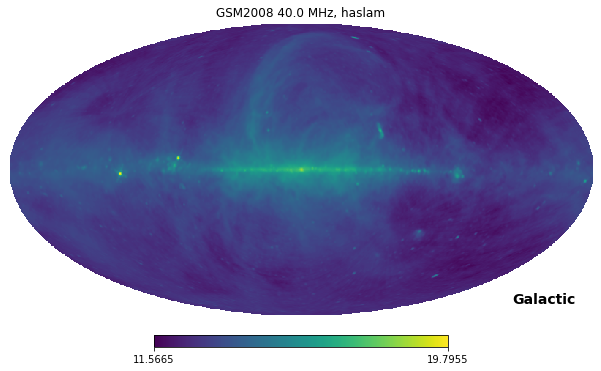

In [6]:
gsm = GlobalSkyModel(freq_unit='MHz')
gsm.generate(40)
gsm.view(logged=True)

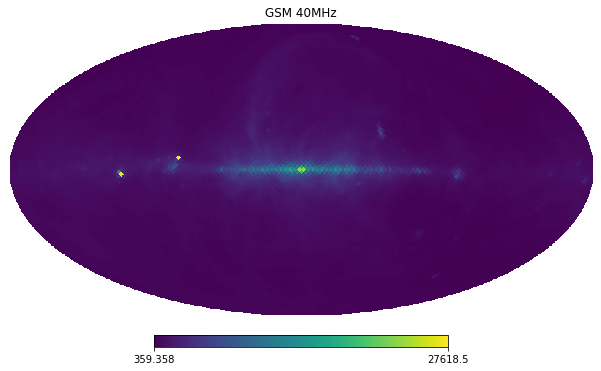

In [4]:
beam, angindices, simbeam = point_beam(np.pi/2, 0)
nside_beam = hp.npix2nside(len(simbeam))

#generate map from 50 to 150 MHz
gsm = GlobalSkyModel(freq_unit='MHz')
nside_beam = hp.npix2nside(len(simbeam))
mapcube = []
for f in range(50,150):
    mapslice = gsm.generate(f)
    mapslice = hp.ud_grade(mapslice, nside_beam)
    mapcube.append(mapslice)
mapcube = np.array(mapcube)
hp.mollview(mapcube[50], title='GSM 40MHz')

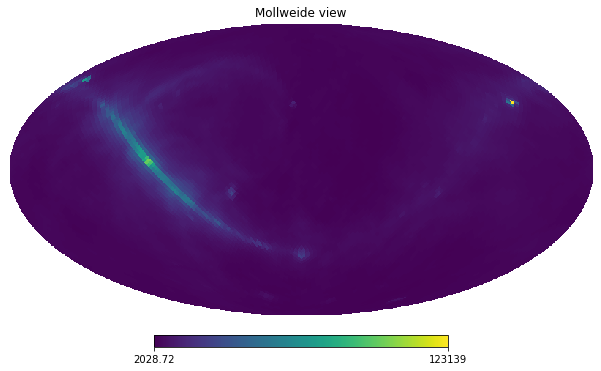

In [7]:
#Aaron's old code to rotate the sky s.t. velocity dipole is in the z-direction

phi_cmb_dipole = 263.85 
theta_cmb_dipole = (90-48.25)
rot_dipole = hp.Rotator([phi_cmb_dipole, theta_cmb_dipole, 0], eulertype='ZXZ')
# rotate_beam()
hp.mollview(rot_dipole.rotate_map_pixel(mapcube[0]))

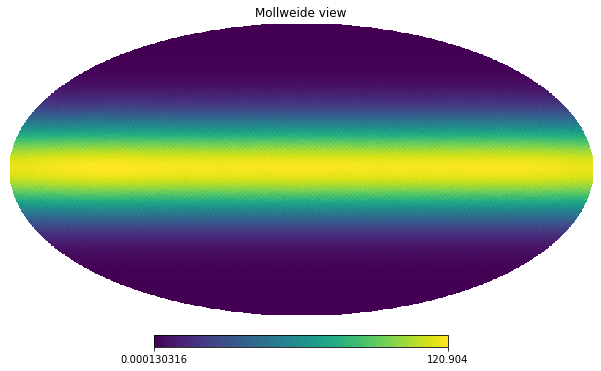

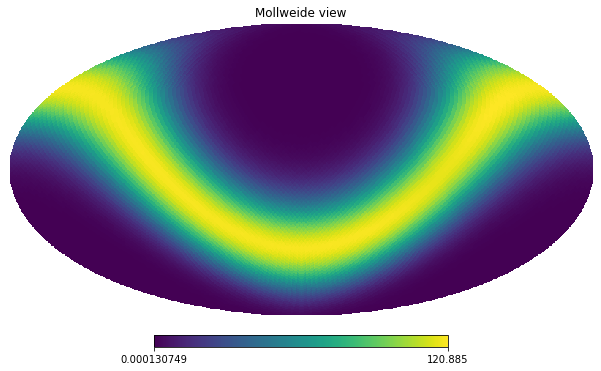

In [8]:
nsteps=1000
ls = np.linspace(60, 420, nsteps) % 360
bs = np.linspace(0, 0, nsteps)
psis = np.zeros(nsteps)
skycov_gal = sky_coverage(ls, bs, psis, beamthetastd=0.3, beamphistd=0.3, display=False)
hp.mollview(np.sum(skycov_gal, axis=0))
hp.mollview(rot_dipole.rotate_map_pixel(np.sum(skycov_gal, axis=0)))

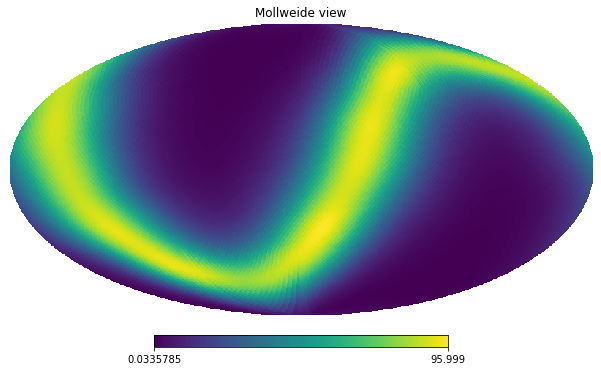

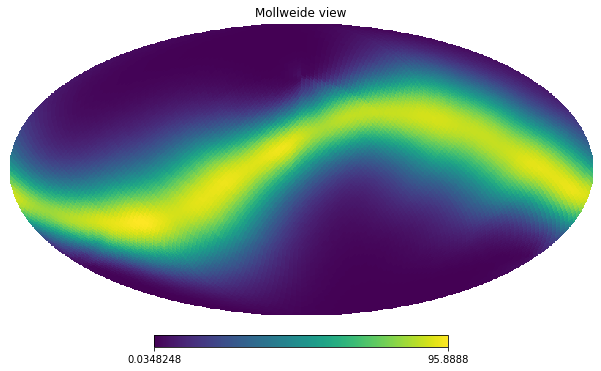

In [9]:
nsteps=1000
ras = np.linspace(60, 420, nsteps) % 360
decs = np.linspace(0, 0, nsteps)
psis = np.linspace(0, 16*np.pi, nsteps) % 2*np.pi
skycov = sky_coverage(ras, decs, psis, beamthetastd=0.3, beamphistd=0.3, coordsys='c', nside=32, display=False)
hp.mollview(np.sum(skycov, axis=0))
hp.mollview(rot_dipole.rotate_map_pixel(np.sum(skycov, axis=0)))

/home/joheenc/anaconda3/envs/genl/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


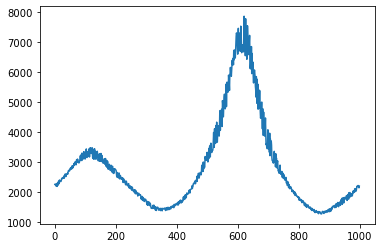

In [25]:
# blm = np.array([hp.map2alm(rot_dipole.rotate_map_pixel(bstep), lmax=15) for bstep in skycov])
# alm = hp.map2alm(rot_dipole.rotate_map_pixel(mapcube[0]), lmax=15)
Plm = blm @ alm
plt.plot(Plm)

In [26]:
alm

array([ 2.19128656e+04+0.00000000e+00j,  2.53731956e+03+0.00000000e+00j,
       -4.44582773e+03+0.00000000e+00j, -1.11554407e+03+0.00000000e+00j,
       -6.27639842e+02+0.00000000e+00j, -4.23905458e+02+0.00000000e+00j,
        4.99059337e+02+0.00000000e+00j,  3.73378481e+02+0.00000000e+00j,
        5.64050664e+02+0.00000000e+00j,  9.75377213e+01+0.00000000e+00j,
       -2.28346737e+02+0.00000000e+00j, -2.87286259e+00+0.00000000e+00j,
       -2.38440282e+02+0.00000000e+00j, -3.20095613e+01+0.00000000e+00j,
        5.71873448e+01+0.00000000e+00j, -1.53314389e+02+0.00000000e+00j,
        1.43326683e+03+5.58363283e+03j,  3.22095792e+03+7.42347616e+02j,
        4.08441419e+02-1.69617578e+03j, -1.43042013e+03-1.59148263e+02j,
       -4.97791931e+02+5.87902393e+02j, -4.45319897e+02-2.66785219e+02j,
        1.86137314e+02-3.15988618e+02j,  4.88416873e+02-2.18585507e+02j,
        1.42493490e+02-1.21021312e+02j,  3.79657117e+02-4.14015373e+01j,
        6.76047684e+01+4.51759244e+01j, -2.82018178